In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import os

home = True

In [56]:
if home is True:
    path = 'data'
else:
    path = '../input'
    
print(os.listdir('{}/'.format(path)))
# Any results you write to the current directory are saved as output.

['sign_mnist_train.csv', 'sign_mnist_test.csv', 'amer_sign3.png', 'american_sign_language.PNG', 'amer_sign2.png']


In [61]:
train = open('{}/sign_mnist_train.csv'.format(path))
test = open('{}/sign_mnist_test.csv'.format(path))


In [62]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
# labels represents letters. 
y_values = train_df.label.values

diff_vals = np.unique(train_df.label.values)

In [63]:
train_df.shape

train_df.drop('label', axis=1, inplace=True)
images = np.array([])
for i, row in train_df.iterrows():
    images.append(row.values.reshape(28, 28))

plt.imshow(images[0])

print(len(images))

AttributeError: 'numpy.ndarray' object has no attribute 'append'

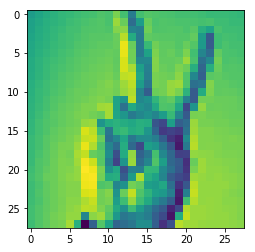

In [53]:
x_train, x_test, y_train, y_test = train_test_split(images, y_values, test_size = 0.2,
                                                    random_state = 64209)

batch_size = 128
num_classes = 24
epochs = 64

plt.imshow(x_train[0])

In [50]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

AttributeError: 'list' object has no attribute 'reshape'

In [48]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [49]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 21964 arrays: [array([[141, 147, 153, 157, 161, 162, 165, 167, 169, 172, 170, 186, 168,
        116, 168, 174, 172, 171, 170, 168, 168, 167, 166, 163, 164, 164,
        162, 161],
       [144, 150, 155, 158, 161, 1...

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()